## Introducción

Para esta tarea se programaron los métodos de interpolación de Newton, Lagrange, Hermite y Newton con 4 puntos. Los códigos están escritos en C en el archivo interp.c con header interp.h. A partir de estos archivos se genera una biblioteca de python con la ayuda de la herramienta Swig. Se muestran los resultados en este reporte con la ayuda de numpy para el manejo de arreglos.

Importa numpy para manejo de arreglos, matplotlib para la graficación e interp1 con funciones de interpolación escritas en C.<br><br>
Biblioteca interp1 contiene funciones:
* newton_interp: interpolación de Newton
* lagrange_interp: interpolación de Lagrange
* hermite_interp: interpolación de Hermite
* newton_piecewise_interp: interpolación de Newton con 4 puntos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import interp1

## Newton interpolation

### $f(x) = sin(x)$ con $x \epsilon [-\pi, \pi]$

Se calcula polinomio de interpolación a partir de los puntos $x_0, x_1, ..., x_n$ y los valores de $f(x_0), f(x_1), ..., f(x_n)$ con $n = 4$.

In [34]:
x1 = np.linspace(-np.pi, np.pi, 4)
x2 = np.array([-np.pi, -np.pi/2, np.pi/2, np.pi])
p = np.linspace(-np.pi, np.pi, 100)

print("Tiempo de ejecución: \n")

y1 = interp1.newton_interp(x1,np.sin(x1),p,len(p))
%time y2 = interp1.newton_interp(x2,np.sin(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 51 µs, sys: 1 µs, total: 52 µs
Wall time: 63.7 µs


Se compara la función $f(x)$ con los valores (p, y) interpolados mediante Newton, para n = 4, moviendo los puntos intermedios. Se puede notar que el espacio entre cada $x_i$ afecta considerablemente el polinomio que se genera, dando mejores resultados el segundo polinomio, donde los puntos intermedios se mueven $-\pi/2$ y $\pi/2$ que son los puntos donde f(x) toma su valor más bajo y más alto respectivamente.

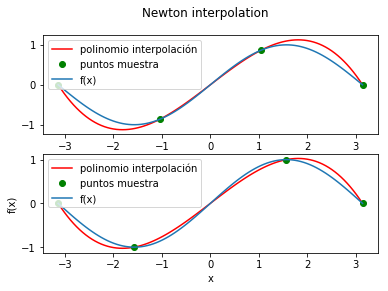

In [3]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, np.sin(x1), 'go', label='puntos muestra')
axs[1].plot(x2, np.sin(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-np.pi, np.pi, 100)
ft = np.sin(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Newton interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### $f(x) = x^2(5x-3)-2x^4+4x-5$ con $x \epsilon [-2, 4]$

In [4]:
def func(x):
    return (x**2)*(5*x-3)-2*(x**4)+4*x-5

Se calcula polinomio de interpolación a partir de los puntos $x_0, x_1, ..., x_n$ y los valores de $f(x_0), f(x_1), ..., f(x_n)$ con $n = 4$.

In [5]:
x1 = np.linspace(-2, 4, 4)
x2 = np.linspace(-2, 4, 5)
p = np.linspace(-2, 4, 100)

print("Tiempo de ejecución: \n")

y1 = interp1.newton_interp(x1,func(x1),p,len(p))
%time y2 = interp1.newton_interp(x2,func(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 119 µs, sys: 8 µs, total: 127 µs
Wall time: 137 µs


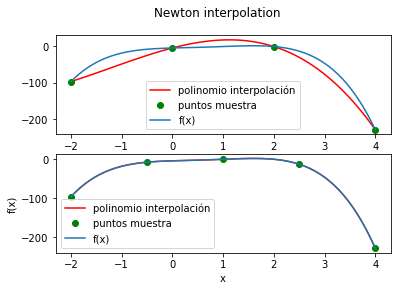

In [6]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, func(x1), 'go', label='puntos muestra')
axs[1].plot(x2, func(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-2, 4, 100)
ft = func(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Newton interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### Análisis Error

Se puede observar que el error de interpolación disminuye considerablemente al pasar de n = 4 a n = 5. También se puede observar que para el polinomio de interpolación con 4 puntos P4(x) el error tiene un comportamiento oscilatorio.

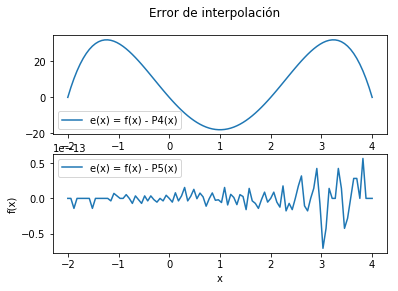

In [7]:
fig, axs = plt.subplots(2)
xt = np.linspace(-2, 4, 100)
ft = func(xt) - y1
axs[0].plot(xt, ft, label='e(x) = f(x) - P4(x)')
ft = func(xt) - y2
axs[1].plot(xt, ft, label='e(x) = f(x) - P5(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Error de interpolación')
axs[0].legend()
axs[1].legend()
plt.show()

In [8]:
errors = []
m = 11

for i in range(2, m):
    x = np.linspace(-2, 4, i)
    p = np.linspace(-2, 4, 100)
    y = interp1.newton_interp(x,func(x),p,len(p))
    errors.append( np.mean( np.abs(func(p) - y) ) )

También se puede observar que para n entre 2 y 5 el error se reduce de manera considerable, pero a partir de n = 6, el error deja de disminuir.

In [9]:
for i in range(2, m):
    print("Error promedio de e(x) con n = {0} es {1}".format(i, errors[i-2]))

Error promedio de e(x) con n = 2 es 128.282182708629
Error promedio de e(x) con n = 3 es 24.465372651298022
Error promedio de e(x) con n = 4 es 17.231838680654104
Error promedio de e(x) con n = 5 es 9.056089211867401e-15
Error promedio de e(x) con n = 6 es 2.0169907410938492e-14
Error promedio de e(x) con n = 7 es 1.6012746684168632e-14
Error promedio de e(x) con n = 8 es 3.550489763304299e-14
Error promedio de e(x) con n = 9 es 2.8546054409162025e-14
Error promedio de e(x) con n = 10 es 5.5784439567663215e-14


## Lagrange interpolation

### $f(x) = sin(x)$ con $x \epsilon [-\pi, \pi]$

Se definen los puntos $x_0, x_1, ..., x_n$ y los valores de $f(x_0), f(x_1), ..., f(x_n)$ para $f(x) = sin(x)$ y con $n = 4$

In [10]:
x1 = np.linspace(-np.pi, np.pi, 4)
x2 = np.array([-np.pi, -np.pi/2, np.pi/2, np.pi])
p = np.linspace(-np.pi, np.pi, 100)

print("Tiempo de ejecución: \n")

y1 = interp1.newton_interp(x1,np.sin(x1),p,len(p))
%time y2 = interp1.lagrange_interp(x2,np.sin(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 208 µs, sys: 0 ns, total: 208 µs
Wall time: 218 µs


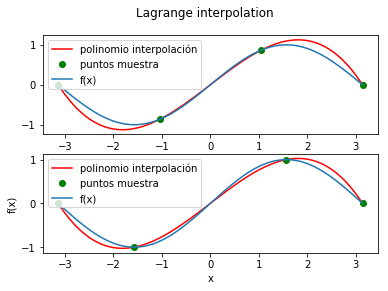

In [11]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, np.sin(x1), 'go', label='puntos muestra')
axs[1].plot(x2, np.sin(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-np.pi, np.pi, 100)
ft = np.sin(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Lagrange interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### $f(x) = x^2(5x-3)-2x^4+4x-5$ con $x \epsilon [-2, 4]$

In [12]:
def func(x):
    return (x**2)*(5*x-3)-2*(x**4)+4*x-5

Se calcula polinomio de interpolación a partir de los puntos $x_0, x_1, ..., x_n$ y los valores de $f(x_0), f(x_1), ..., f(x_n)$ con $n = 4$.

In [13]:
x1 = np.linspace(-2, 4, 3)
x2 = np.linspace(-2, 4, 5)
p = np.linspace(-2, 4, 100)

print("Tiempo de ejecución: \n")

y1 = interp1.lagrange_interp(x1,func(x1),p,len(p))
%time y2 = interp1.lagrange_interp(x2,func(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 325 µs, sys: 14 µs, total: 339 µs
Wall time: 351 µs


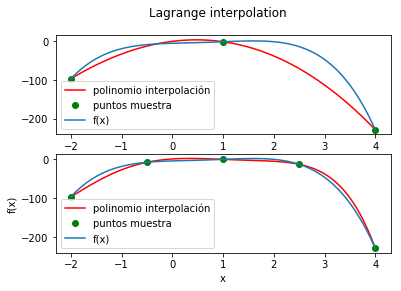

In [14]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, func(x1), 'go', label='puntos muestra')
axs[1].plot(x2, func(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-2, 4, 100)
ft = func(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Lagrange interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### Análisis Error

Se puede observar que el error de interpolación disminuye considerablemente al pasar de n = 3 a n = 5. Además se observa el mismo comportamiento oscilatorio del error.

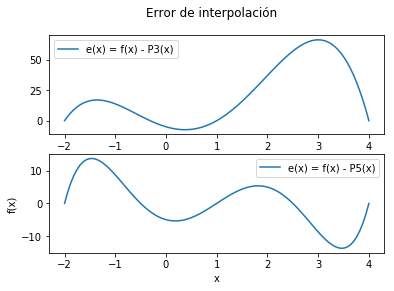

In [15]:
fig, axs = plt.subplots(2)
xt = np.linspace(-2, 4, 100)
ft = func(xt) - y1
axs[0].plot(xt, ft, label='e(x) = f(x) - P3(x)')
ft = func(xt) - y2
axs[1].plot(xt, ft, label='e(x) = f(x) - P5(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Error de interpolación')
axs[0].legend()
axs[1].legend()
plt.show()

In [16]:
errors = []
m = 11

for i in range(2, m):
    x = np.linspace(-2, 4, i)
    p = np.linspace(-2, 4, 100)
    y = interp1.lagrange_interp(x,func(x),p,len(p))
    errors.append( np.mean( np.abs(func(p) - y) ) )

En este caso se puede observar que para algunos valores de n, la interpolación se vuelve inestable ya que al evaluar el polinomio, se realizan divisiones de la forma $x_i - x_j$, donde además estas divisiones se multiplican y si estos llegan a estar muy cercanos a cero, habrá errores numéricos.

In [17]:
for i in range(2, m):
    print("Error promedio de e(x) con n = {0} es {1}".format(i, errors[i-2]))

Error promedio de e(x) con n = 2 es 25.28888445351756
Error promedio de e(x) con n = 3 es 23.483734869354702
Error promedio de e(x) con n = 4 es inf
Error promedio de e(x) con n = 5 es 5.946381131269081
Error promedio de e(x) con n = 6 es 7.5332926102283295
Error promedio de e(x) con n = 7 es inf
Error promedio de e(x) con n = 8 es 13.609889897600299
Error promedio de e(x) con n = 9 es 8.599034276190186e-06
Error promedio de e(x) con n = 10 es inf


## Hermite interpolation

### $f(x) = sin(x)$ con $x \epsilon [-\pi, \pi]$

Se definen los puntos $x_0, x_1, ..., x_n$, los valores de $f(x_0), f(x_1), ..., f(x_n)$ y los valores de $f´(x_0), f´(x_1), ..., f´(x_n)$ con $n = 4$

In [18]:
x1 = np.linspace(-np.pi, np.pi, 4)
x2 = np.array([-np.pi, -np.pi/2, np.pi/2, np.pi])
p = np.linspace(-np.pi, np.pi, 100)

print("Tiempo de ejecución: \n")

y1 = interp1.hermite_interp(x1,np.sin(x1),np.cos(x1),p,len(p))
%time y2 = interp1.hermite_interp(x2,np.sin(x2),np.cos(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 49 µs, sys: 2 µs, total: 51 µs
Wall time: 62.7 µs


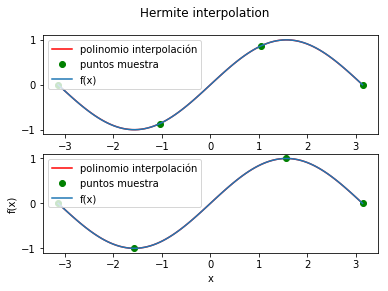

In [19]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, np.sin(x1), 'go', label='puntos muestra')
axs[1].plot(x2, np.sin(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-np.pi, np.pi, 100)
ft = np.sin(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Hermite interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### $f(x) = x^2(5x-3)-2x^4+4x-5$ con $x \epsilon [-2, 4]$

In [20]:
def func(x):
    return (x**2)*(5*x-3)-2*(x**4)+4*x-5

def funcp(x):
    return -8*(x**3)+15*(x**2)-6*x+4

Se calcula polinomio de interpolación a partir de los puntos $x_0, x_1, ..., x_n$ y los valores de $f(x_0), f(x_1), ..., f(x_n)$ con $n = 4$.

In [21]:
x1 = np.linspace(-2, 4, 4)
x2 = np.linspace(-2, 4, 5)
p = np.linspace(-2, 4, 100)

print("Tiempo de ejecución: \n")

y1 = interp1.hermite_interp(x1,func(x1),funcp(x1),p,len(p))
%time y2 = interp1.hermite_interp(x2,func(x2),funcp(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 122 µs, sys: 5 µs, total: 127 µs
Wall time: 135 µs


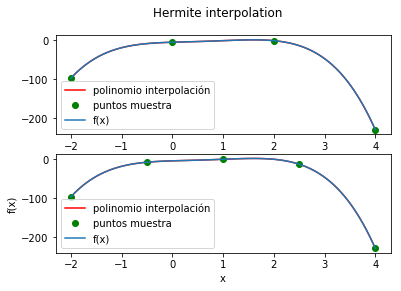

In [22]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, func(x1), 'go', label='puntos muestra')
axs[1].plot(x2, func(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-2, 4, 100)
ft = func(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Hermite interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### Análisis Error

Se puede observar que el error de interpolación disminuye considerablemente al pasar de n = 3 a n = 5. Además se observa el mismo comportamiento oscilatorio del error.

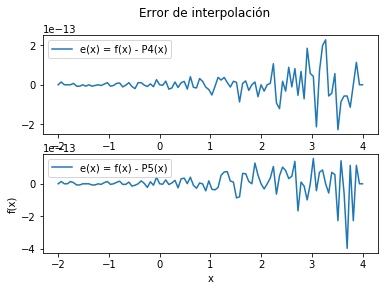

In [23]:
fig, axs = plt.subplots(2)
xt = np.linspace(-2, 4, 100)
ft = func(xt) - y1
axs[0].plot(xt, ft, label='e(x) = f(x) - P4(x)')
ft = func(xt) - y2
axs[1].plot(xt, ft, label='e(x) = f(x) - P5(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Error de interpolación')
axs[0].legend()
axs[1].legend()
plt.show()

In [24]:
errors = []
m = 11

for i in range(2, m):
    x = np.linspace(-2, 4, i)
    p = np.linspace(-2, 4, 100)
    y = interp1.hermite_interp(x,func(x),funcp(x),p,len(p))
    errors.append( np.mean( np.abs(func(p) - y) ) )

Se puede observar que al pasar de n = 2 a n = 3 el error se reduce considerablemente y que a partir de n = 3 el error deja de disminuir y es bastante similar al de Newton. Lo cual es de esperarse ya que este método usa información adicional (derivadas en los puntos de interpolación), y eso se ve reflejado en el mejor ajuste que se logra.

In [25]:
for i in range(2, m):
    print("Error promedio de e(x) con n = {0} es {1}".format(i, errors[i-2]))

Error promedio de e(x) con n = 2 es 85.53599910955282
Error promedio de e(x) con n = 3 es 2.4677482279855668e-14
Error promedio de e(x) con n = 4 es 3.5274005938390477e-14
Error promedio de e(x) con n = 5 es 4.1677772344428374e-14
Error promedio de e(x) con n = 6 es 4.981671325454684e-14
Error promedio de e(x) con n = 7 es 5.1030291103870694e-14
Error promedio de e(x) con n = 8 es 5.6192550612621516e-14
Error promedio de e(x) con n = 9 es 5.736300323633258e-14
Error promedio de e(x) con n = 10 es 7.134109275552802e-14


## Newton piecewise with 4 points

### $f(x) = sin(x)$ con $x \epsilon [-\pi, \pi]$

Se definen los puntos $x_0, x_1, ..., x_n$ y los valores de $f(x_0), f(x_1), ..., f(x_n)$ para $f(x) = sin(x)$ y con $n = 4$

In [26]:
x1 = np.linspace(-np.pi, np.pi, 4)
x2 = np.linspace(-np.pi, np.pi, 8)
p = np.linspace(-np.pi, np.pi, 100)

print("Tiempo de ejecución: \n")

%time y1 = interp1.newton_piecewise_interp(x1,np.sin(x1),p,len(p))
y2 = interp1.newton_piecewise_interp(x2,np.sin(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 1.98 ms, sys: 69 µs, total: 2.05 ms
Wall time: 2.06 ms


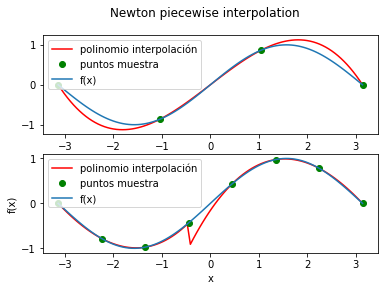

In [27]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, np.sin(x1), 'go', label='puntos muestra')
axs[1].plot(x2, np.sin(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-np.pi, np.pi, 100)
ft = np.sin(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Newton piecewise interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### $f(x) = x^2(5x-3)-2x^4+4x-5$ con $x \epsilon [-2, 4]$

In [28]:
def func(x):
    return (x**2)*(5*x-3)-2*(x**4)+4*x-5

Se calcula polinomio de interpolación a partir de los puntos $x_0, x_1, ..., x_n$ y los valores de $f(x_0), f(x_1), ..., f(x_n)$ con $n = 4$.

In [29]:
x1 = np.linspace(-2, 4, 4)
x2 = np.linspace(-2, 4, 8)
p = np.linspace(-2, 4, 100)

print("Tiempo de ejecución: \n")

y1 = interp1.newton_piecewise_interp(x1,func(x1),p,len(p))
%time y2 = interp1.newton_piecewise_interp(x2,func(x2),p,len(p))

Tiempo de ejecución: 

CPU times: user 0 ns, sys: 2.68 ms, total: 2.68 ms
Wall time: 2.48 ms


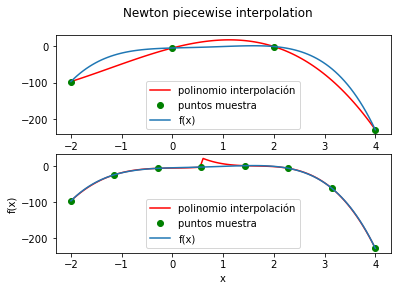

In [30]:
fig, axs = plt.subplots(2)

# Interpolation polynomial sample 1
axs[0].plot(p, y1, 'r', label='polinomio interpolación')

# Interpolation polynomial sample 2
axs[1].plot(p, y2, 'r', label='polinomio interpolación')

# Sample points used for interpolation
axs[0].plot(x1, func(x1), 'go', label='puntos muestra')
axs[1].plot(x2, func(x2), 'go', label='puntos muestra')

# f(x)
xt = np.linspace(-2, 4, 100)
ft = func(xt)
axs[0].plot(xt, ft, label='f(x)')
axs[1].plot(xt, ft, label='f(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Newton piecewise interpolation')
axs[0].legend()
axs[1].legend()
plt.show()

### Análisis Error

Al realizarse la interpolación de Newton a pedazos usando 4 puntos por pedazo, en los límites de cada intervalo se notan pequeños salton, lo cual hace que el error aumente considerablemente en estas regiones y por lo tanto que el promedio de error también aumente.

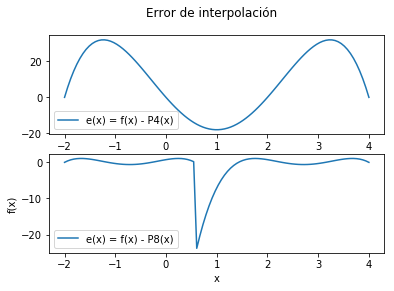

In [31]:
fig, axs = plt.subplots(2)
xt = np.linspace(-2, 4, 100)
ft = func(xt) - y1
axs[0].plot(xt, ft, label='e(x) = f(x) - P4(x)')
ft = func(xt) - y2
axs[1].plot(xt, ft, label='e(x) = f(x) - P8(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
fig.suptitle('Error de interpolación')
axs[0].legend()
axs[1].legend()
plt.show()

In [32]:
errors = []
m = 11

for i in range(2, m):
    x = np.linspace(-2, 4, i)
    p = np.linspace(-2, 4, 100)
    y = interp1.newton_piecewise_interp(x,func(x),p,len(p))
    errors.append( np.mean( np.abs(func(p) - y) ) )

Se puede observar que el error tiende a disminuir pero entre n = 4*k y n = 4*k + 1 se dan pequeños salton que corresponden al hecho de que la curva generada no es continua.

In [33]:
for i in range(2, m):
    print("Error promedio de e(x) con n = {0} es {1}".format(i, errors[i-2]))

Error promedio de e(x) con n = 2 es 84.21781729137103
Error promedio de e(x) con n = 3 es 35.71781729137101
Error promedio de e(x) con n = 4 es 17.231838680654104
Error promedio de e(x) con n = 5 es 28.433174722430927
Error promedio de e(x) con n = 6 es 26.50160282312229
Error promedio de e(x) con n = 7 es 25.79994137889455
Error promedio de e(x) con n = 8 es 1.7559438919848256
Error promedio de e(x) con n = 9 es 20.16781581308958
Error promedio de e(x) con n = 10 es 24.403188079138495


### Conclusiones

Si ordenamos los tiempos de ejecución de los 4 métodos se puede notar que el método de Hermite fue el más rápido con un tiempo de ejecución de $49 \mu s$, seguido del método de Newton con un tiempo de ejecución de $51 \mu s$. Lo cual es razonable ya que la forma de calcular los coeficientes es bastante parecida (diferencias divididas). Para el método de Lagrange se obtuvo un tiempo de ejecución de $208 \mu s$ y finalmente para Newton con 4 puntos se obtuvo un tiempo de ejecución de $1.98 ms$.

En cuanto al error numérico se pudo observar claramente que la interpolación de Hermite es la que generó un mejor ajuste a las funciones. Lo cual, como ya se comentó, es de esperarse debido a las restricciones extra sobre las derivadas que se imponen, lo cual es información extra que permite encontrar un mejor polinomio.

Para los métodos de Newton y Lagrange se pudo observar un error similar para el caso de $f(x) = sin(x)$ mientras que para $f(x) = x^2(5x-3)-2x^4+4x-5$, el método de Newton generó un mejor ajuste. En el caso de Newton con 4 puntos, el ajuste también fue similar al de Newton excepto por los puntos donde cambia el polinomio.

Con base en estos resultados, se podría concluir que el método de Hermite es el que mejor desempeño presentó tanto en tiempos de ejecución como en error, por lo que sería preferible usar este método siempre y cuando se puedan obtener las derivadas de la función que queremos interpolar. En caso de no tener disponible la información de las derivadas el segundo método con mejores resultados fue el de Newton.